Create a stimulus with a three-to-one match

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import math
from ripser import ripser
from persim import plot_diagrams


import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # otherwise, get latex error when visualizing plots

# Create a more complicated stimulus space

In [2]:
def remove_ellipse(PC, x0, y0, a, b, r):
    # given PC, remove points in the ellipse ((x-x0)/a)^2 + ((y-y0)/b)^2 <= r^2
    n = PC.shape[0]

    # index of points to remove
    remove_idx = []
    for i in range(n):
        x = PC[i,0]
        y = PC[i,1]

        if ((x - x0)/a)**2 + ((y-y0)/b)**2 <= r**2:
            remove_idx.append(i)

    return np.delete(PC, remove_idx, 0)


In [17]:
n_PC1 = 200
PC1 = np.random.uniform(low = 0, high = 0.5, size = (n_PC1,2))

# punch one large ellipse centered at (0.8, 0.8) that covers 3 ellipses in PC1
PC1 = remove_ellipse(PC1, 0.25, 0.25, 1, 1.2, 0.18)

print("number of points in PC1: ", PC1.shape[0])


number of points in PC1:  102


In [56]:
n_PC2 = 300

PC2 = np.random.uniform(low = 0, high = 0.5, size = (n_PC2, 2))

# punch three discs near each other
PC2 = remove_ellipse(PC2, 0.1, 0.3, 0.4, 0.4, 0.18)

# punch three discs near each other
PC2 = remove_ellipse(PC2, 0.3, 0.1, 0.7, 0.4, 0.18)

# punch three discs near each other
PC2 = remove_ellipse(PC2, 0.35, 0.35, 0.3, 0.7, 0.18)

print("number of points in PC2: ", PC2.shape[0])


number of points in PC2:  236


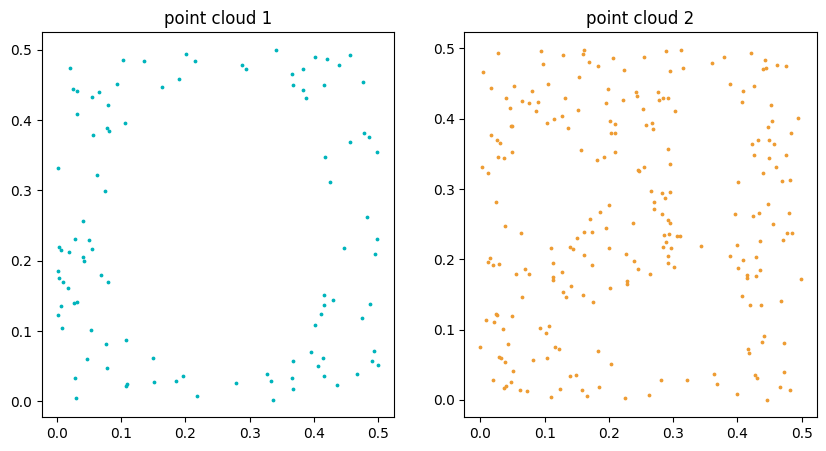

In [57]:
fig, ax = plt.subplots(ncols = 2, figsize = (10,5))
ax[0].scatter(PC1[:,0], PC1[:,1], color = "#00b4bc", s = 3)
ax[0].set_title("point cloud 1")
ax[1].scatter(PC2[:,0], PC2[:,1], color = "#ee9c33", s = 3)
ax[1].set_title("point cloud 2")
plt.show()

## Check PH

In [26]:
persistence1 = ripser(PC1,
                    maxdim=1,
                    coeff=47,
                    do_cocycles=True,
                    )

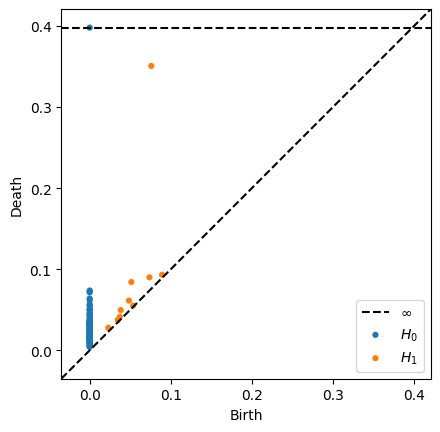

In [27]:
plt.figure()
plot_diagrams(persistence1["dgms"])
plt.show()

In [58]:
persistence2 = ripser(PC2,
                    maxdim=1,
                    coeff=47,
                    do_cocycles=True,
                    )

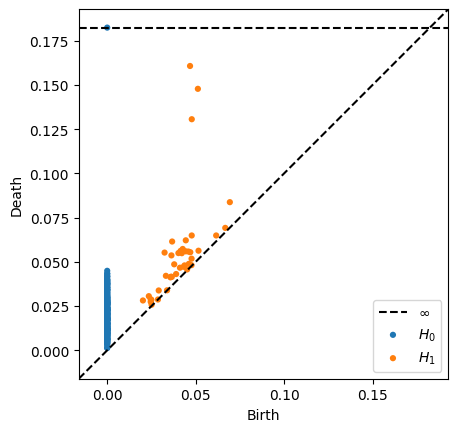

In [59]:
plt.figure()
plot_diagrams(persistence2["dgms"])
plt.show()

In [60]:
# save PC1, PC2
np.savetxt("data/three_to_one_match/P.csv", PC1, delimiter = ",")
np.savetxt("data/three_to_one_match/Q.csv", PC2, delimiter = ",")